<a href="https://colab.research.google.com/github/tusharmaaa/-/blob/main/nutritionds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/tushar/menu.csv'  # Replace with your dataset path
df = pd.read_csv(file_path)

# Display the first few rows
print("Dataset Preview:")
print(df.head())

# Check the basic info about the dataset
print("\nDataset Information:")
print(df.info())

# Check for null values
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Preview:
    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydrates

In [11]:
# Clean column names for easier access
df.columns = [col.strip().replace('(% Daily Value)', '').replace(' ', '_').replace('(', '').replace(')', '') for col in df.columns]

# Display cleaned column names
print("\nCleaned Column Names:")
print(df.columns)



Cleaned Column Names:
Index(['Category', 'Item', 'Serving_Size', 'Calories', 'Calories_from_Fat',
       'Total_Fat', 'Total_Fat_', 'Saturated_Fat', 'Saturated_Fat_',
       'Trans_Fat', 'Cholesterol', 'Cholesterol_', 'Sodium', 'Sodium_',
       'Carbohydrates', 'Carbohydrates_', 'Dietary_Fiber', 'Dietary_Fiber_',
       'Sugars', 'Protein', 'Vitamin_A_', 'Vitamin_C_', 'Calcium_', 'Iron_'],
      dtype='object')


In [12]:
# Generate summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check unique categories
print("\nUnique Categories:")
print(df['Category'].unique())

# Count items per category
category_count = df['Category'].value_counts()
print("\nItems Per Category:")
print(category_count)



Summary Statistics:
          Calories  Calories_from_Fat   Total_Fat  Total_Fat_  Saturated_Fat  \
count   260.000000         260.000000  260.000000  260.000000     260.000000   
mean    368.269231         127.096154   14.165385   21.815385       6.007692   
std     240.269886         127.875914   14.205998   21.885199       5.321873   
min       0.000000           0.000000    0.000000    0.000000       0.000000   
25%     210.000000          20.000000    2.375000    3.750000       1.000000   
50%     340.000000         100.000000   11.000000   17.000000       5.000000   
75%     500.000000         200.000000   22.250000   35.000000      10.000000   
max    1880.000000        1060.000000  118.000000  182.000000      20.000000   

       Saturated_Fat_   Trans_Fat  Cholesterol  Cholesterol_       Sodium  \
count      260.000000  260.000000   260.000000    260.000000   260.000000   
mean        29.965385    0.203846    54.942308     18.392308   495.750000   
std         26.639209    0.

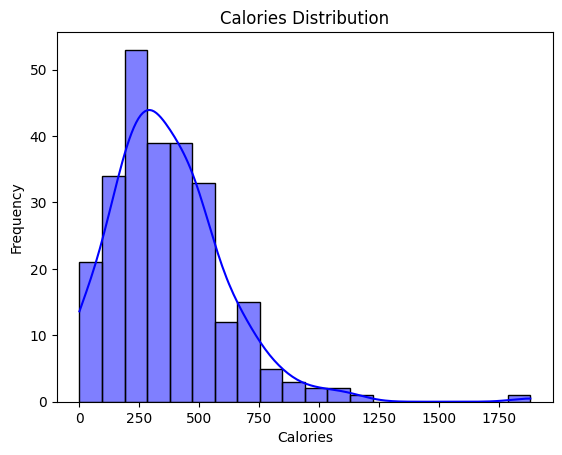

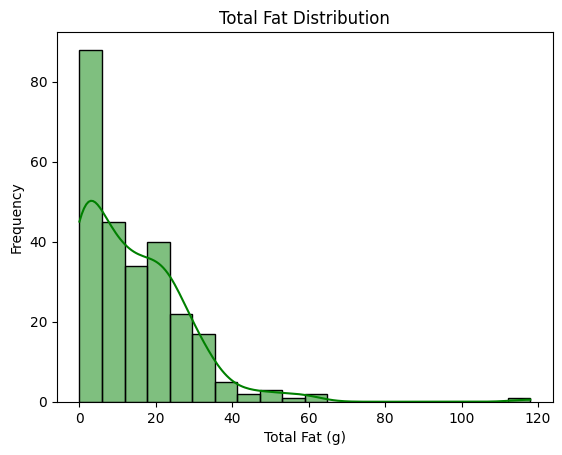

In [13]:
# Distribution of Calories
sns.histplot(df['Calories'], bins=20, kde=True, color='blue')
plt.title("Calories Distribution")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.show()

# Distribution of Total Fat
sns.histplot(df['Total_Fat'], bins=20, kde=True, color='green')
plt.title("Total Fat Distribution")
plt.xlabel("Total Fat (g)")
plt.ylabel("Frequency")
plt.show()


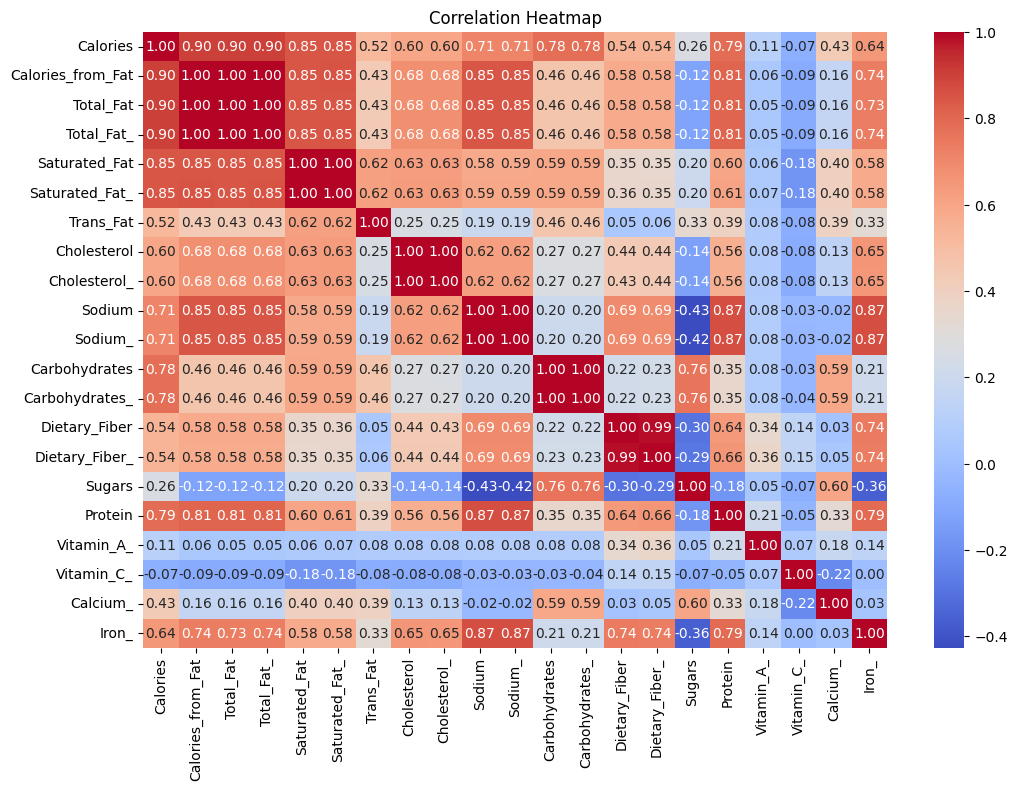

In [15]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


<ipython-input-16-ce67c5674ecd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Calories', data=avg_calories, palette='viridis')


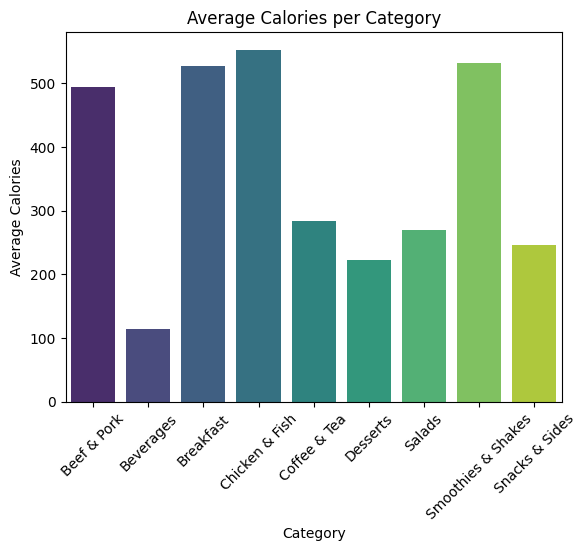

In [16]:
# Average Calories per Category
avg_calories = df.groupby('Category')['Calories'].mean().reset_index()

sns.barplot(x='Category', y='Calories', data=avg_calories, palette='viridis')
plt.title("Average Calories per Category")
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Average Calories")
plt.show()


<ipython-input-17-09a19554e64a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Calories', data=df, palette='Set3')


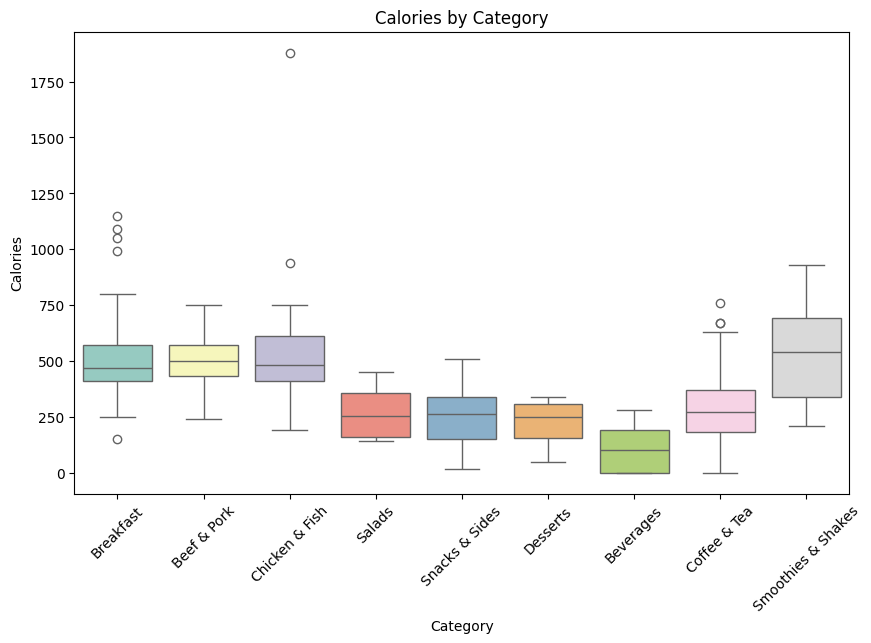

In [17]:
# Boxplot of Calories by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Calories', data=df, palette='Set3')
plt.title("Calories by Category")
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Calories")
plt.show()


In [18]:
# Top 5 items with the highest Calories
top_caloric_items = df.nlargest(5, 'Calories')[['Item', 'Category', 'Calories']]
print("\nTop 5 Most Caloric Items:")
print(top_caloric_items)



Top 5 Most Caloric Items:
                                                 Item        Category  \
82                       Chicken McNuggets (40 piece)  Chicken & Fish   
32        Big Breakfast with Hotcakes (Large Biscuit)       Breakfast   
31      Big Breakfast with Hotcakes (Regular Biscuit)       Breakfast   
34  Big Breakfast with Hotcakes and Egg Whites (La...       Breakfast   
33  Big Breakfast with Hotcakes and Egg Whites (Re...       Breakfast   

    Calories  
82      1880  
32      1150  
31      1090  
34      1050  
33       990  


In [19]:
# Items with low Sodium and Fat
healthy_items = df[(df['Sodium'] < 300) & (df['Total_Fat'] < 10)][['Item', 'Category', 'Calories', 'Sodium', 'Total_Fat']]
print("\nHealthiest Choices (Low Sodium and Fat):")
print(healthy_items)



Healthiest Choices (Low Sodium and Fat):
                                          Item            Category  Calories  \
40                       Fruit & Maple Oatmeal           Breakfast       290   
41   Fruit & Maple Oatmeal without Brown Sugar           Breakfast       260   
87   Premium Southwest Salad (without Chicken)              Salads       140   
99                           Kids French Fries      Snacks & Sides       110   
100                                 Side Salad      Snacks & Sides        20   
..                                         ...                 ...       ...   
236        Strawberry Banana Smoothie (Medium)  Smoothies & Shakes       250   
237         Strawberry Banana Smoothie (Large)  Smoothies & Shakes       330   
238           Mango Pineapple Smoothie (Small)  Smoothies & Shakes       210   
239          Mango Pineapple Smoothie (Medium)  Smoothies & Shakes       260   
240           Mango Pineapple Smoothie (Large)  Smoothies & Shakes       340  

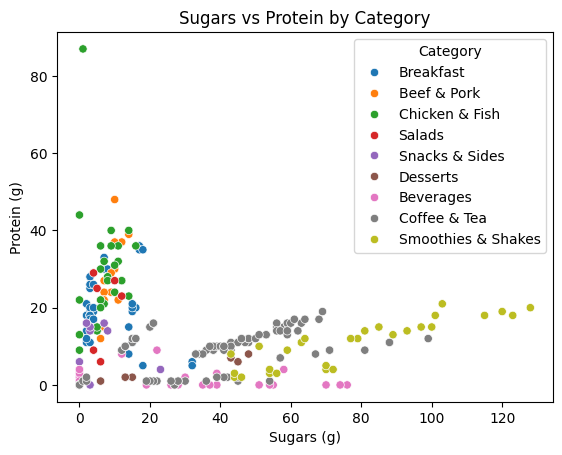

In [23]:
# Scatterplot: Sugars vs. Protein
sns.scatterplot(x='Sugars', y='Protein', hue='Category', data=df, palette='tab10')
plt.title("Sugars vs Protein by Category")
plt.xlabel("Sugars (g)")
plt.ylabel("Protein (g)")
plt.show()


In [24]:
# Save the cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_dataset.csv'")



Cleaned dataset saved as 'cleaned_dataset.csv'
